In [5]:
!pip install -qU wordcloud nltk

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import matplotlib.dates as mdates
from collections import OrderedDict

In [7]:
channels = [
    "CNN-News18",
    "Republic World",
    "India Today",
    "MIRROR NOW",
    "TIMES NOW",
    "DD INDIA",
    "WION",
    "NewsX",
]

In [11]:
df = pd.read_csv("Filtered_labelled_state_transcripts (1).csv")

In [ ]:
df

,Unnamed: 0,videoId,title,description,published_at,channel,thumbnail_url,transcripts,generated_by_youtube,original_lang,views,comments,likes,pre_processed,entities,Label
0,1,Gc1tf5U7BuU,BJP Manifesto Promises To Secure &amp; Protect...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-08T14:19:22Z,CNN-News18,https://i.ytimg.com/vi/Gc1tf5U7BuU/hqdefault.jpg,top story 18 degrees south BJP released manife...,True,en,285,2,9.0,story 18 degree south \n BJP release manifes...,18 -> CARDINAL\nBJP -> ORG\ntoday -> DATE\nsha...,ProGov
1,2,1BAgeFCwR3o,Reporters Project: Andhra Pradesh’s Politics O...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:22:24Z,CNN-News18,https://i.ytimg.com/vi/1BAgeFCwR3o/hqdefault.jpg,[Music] reporters project CNN news 18 reporter...,True,en,1431,3,11.0,reporter project CNN news 18 \n reporter fan...,CNN -> ORG\n18 -> CARDINAL\nApril 11th -> DATE...,ProGov
2,3,HKCBxHhnfC4,Reporters Project: Giving Voice To The Real Is...,BattleOf2019 #ElectionsWithNews18 #LokSabhaEle...,2019-04-07T09:20:19Z,CNN-News18,https://i.ytimg.com/vi/HKCBxHhnfC4/hqdefault.jpg,[Music] reporters project record stories CNN n...,True,en,146,2,2.0,reporter project \n record story CNN news 18...,CNN news -> ORG\n18 -> CARDINAL\nPakistan -> G...,AntiGov
3,4,iLlUz3a4zDg,“I Definitely Don&#39;t Fight A War To Lose” –...,On Off Centre Anuradha SenGupta is talking to ...,2019-04-06T10:28:52Z,CNN-News18,https://i.ytimg.com/vi/iLlUz3a4zDg/hqdefault.jpg,[Music] film stars stranger electoral politics...,True,en,16396,130,205.0,film star stranger electoral \n politic Lok ...,Lok Sabha -> ORG\nyear -> DATE\nLok Sabha -> O...,Neutral
4,5,sLdneSyrx7c,"NaMo TV launched, Rahul Gandhi To Contest From...","NaMo TV channel launched, Rahul Gandhi to cont...",2019-04-06T05:00:02Z,CNN-News18,https://i.ytimg.com/vi/sLdneSyrx7c/hqdefault.jpg,come come come come come come come come come c...,True,en,27536,33,387.0,come come come come come \n come come come c...,BJP -> ORG\nCongress -> ORG\nseven -> CARDINAL...,ProGov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1363,V1pyuUKGEvw,"CBI Selection Panel To Meet On 24th January, 2019",Republic TV is India's no.1 English news chann...,2019-01-16T12:14:38Z,Republic World,https://i.ytimg.com/vi/V1pyuUKGEvw/hqdefault.jpg,breaking news coming far entire internal battl...,True,en,361,0,4.0,breaking news come far \n entire internal ba...,CBI -> ORG\nCBI -> ORG\nAlok Varma -> PERSON\n...,Neutral
1168,1364,qx0a2coAYz4,Church Body&#39;s Letter Accessed By Republic ...,Republic TV is India's no.1 English news chann...,2019-01-16T11:29:33Z,Republic World,https://i.ytimg.com/vi/qx0a2coAYz4/hqdefault.jpg,Oh leave convent editor dungeon fact official ...,True,en,705,6,19.0,oh leave convent editor \n dungeon fact offi...,Jesus -> PERSON\nAlfea -> PERSON\nJesus -> PER...,Neutral
1169,1365,OVUMiE3tCc8,Four Nuns Who Spoke Against Franco Mulakkal Sh...,Republic TV is India's no.1 English news chann...,2019-01-16T11:15:26Z,Republic World,https://i.ytimg.com/vi/OVUMiE3tCc8/hqdefault.jpg,pull away uh breaking update Santa Fe's gettin...,True,en,16305,47,104.0,pull away uh break \n update Santa Fe gettin...,Santa Fe -> ORG\nFranco -> PERSON\nKerala -> G...,AntiGov
1170,1366,mF09iL30OCY,"After Being Dumped By SP-BSP, Rahul Gandhi For...",Republic TV is India's no.1 English news chann...,2019-01-15T06:14:38Z,Republic World,https://i.ytimg.com/vi/mF09iL30OCY/hqdefault.jpg,let's quickly turn attention Congress party sn...,True,en,364,3,6.0,let quickly turn attention \n Congress party...,Congress -> ORG\nAkhilesh Yadav -> PERSON\nnot...,Neutral


In [ ]:
df["channel"] = df["channel"].apply(lambda x: "DD INDIA" if x == "S1mple" else x)

In [ ]:
df["Label"].value_counts()

Label
Neutral    608
ProGov     484
AntiGov     80
Name: count, dtype: int64

In [ ]:
categorical_label = pd.Series(df["Label"], dtype="category")
categorical_channels = [channels.index(a) for a in df["channel"]]

(array([484.,   0.,   0.,   0.,   0.,  80.,   0.,   0.,   0., 608.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

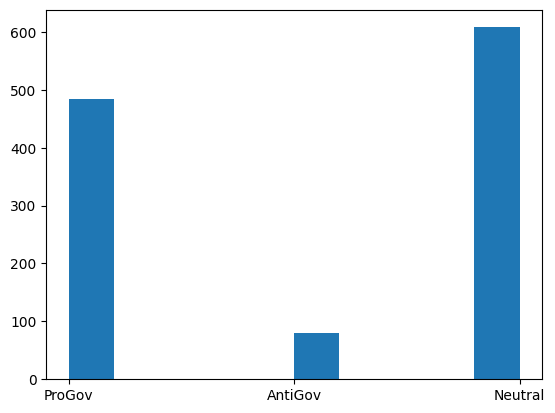

In [ ]:
plt.hist(categorical_label)

In [ ]:
df["channel"].value_counts()

channel
WION              330
MIRROR NOW        199
DD INDIA          126
India Today       122
Republic World    105
TIMES NOW         103
NewsX             100
CNN-News18         87
Name: count, dtype: int64

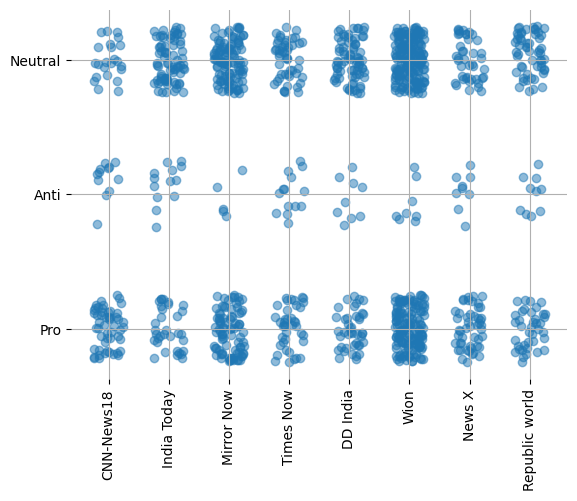

In [ ]:
new = df.copy()
new["Label"] = pd.factorize(df['Label'])[0] + 1
new["channel"] = pd.factorize(df['channel'])[0] + 1

xnoise, ynoise = np.random.random(len(df))/2, np.random.random(len(df))/2 # The noise is in the range 0 to 0.5

# Plot the scatterplot
plt.scatter(new["channel"].apply(lambda x: float(x))+xnoise, new["Label"].apply(lambda x: float(x))+ynoise, alpha=0.5)
# You can also set xticks and yticks to be your category names:
plt.xticks([1.25, 2.25, 3.25, 4.25, 5.25, 6.25, 7.25, 8.25], ["CNN-News18", "India Today", "Mirror Now", "Times Now", "DD India", "Wion", "News X", "Republic world"], rotation = 90) # The reason the xticks start at 0.25
plt.yticks([1.25, 2.25, 3.25], ["Pro", "Anti", "Neutral"])

plt.grid()
sns.despine(left=True, bottom=True)

<Axes: xlabel='Label', ylabel='count'>

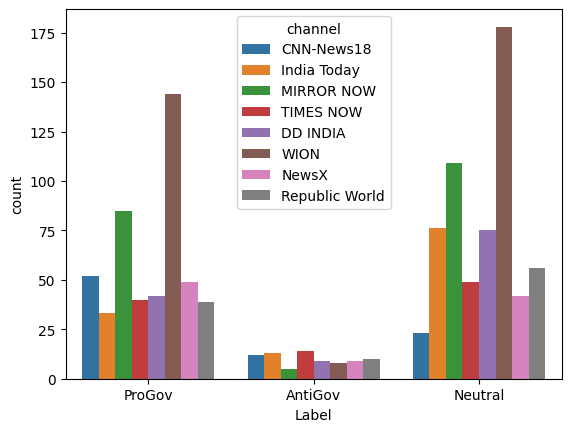

In [ ]:
sns.countplot(x='Label', hue="channel", data=df)

<Axes: xlabel='Label', ylabel='likes'>

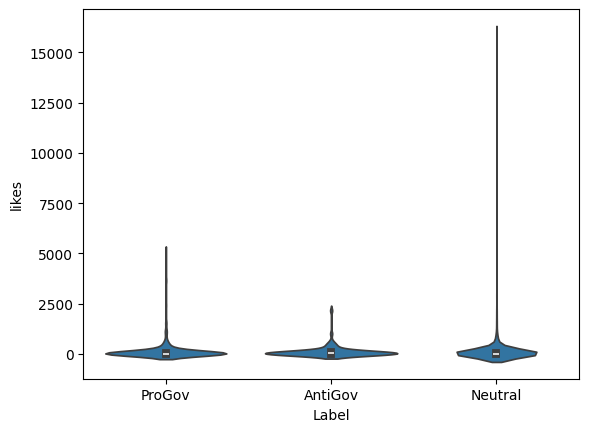

In [ ]:
sns.violinplot(x="Label", y="likes", data=df)

<Axes: xlabel='Label', ylabel='comments'>

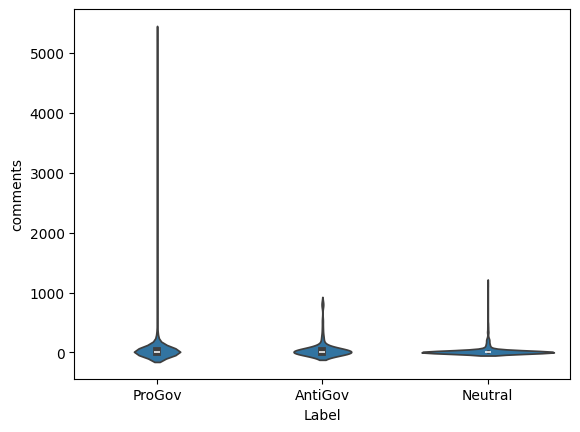

In [ ]:
sns.violinplot(x="Label", y="comments", data=df)

<Axes: xlabel='Label', ylabel='views'>

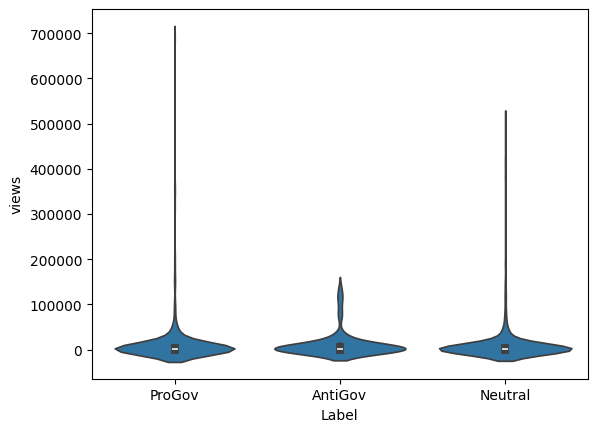

In [ ]:
sns.violinplot(x="Label", y="views", data=df)

In [ ]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df["published_at"]]
vid_freq = {}
for _, row in df.iterrows():
    if row["published_at"].split("T")[0] in vid_freq:
        vid_freq[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq[row["published_at"].split("T")[0]] = 1

In [ ]:
ordered = OrderedDict(sorted(vid_freq.items(), key=lambda t: t[0]))

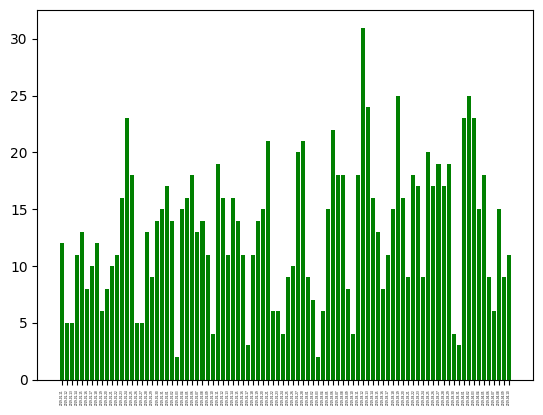

In [ ]:
plt.xticks(rotation=90, fontsize=2)
plt.bar(ordered.keys(), ordered.values(), color='g');

In [ ]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "Neutral"]["published_at"]]
vid_freq_neutral = {}
for _, row in df[df["Label"] == "Neutral"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_neutral:
        vid_freq_neutral[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_neutral[row["published_at"].split("T")[0]] = 1

In [ ]:
ordered_neutral = OrderedDict(sorted(vid_freq_neutral.items(), key=lambda t: t[0]))

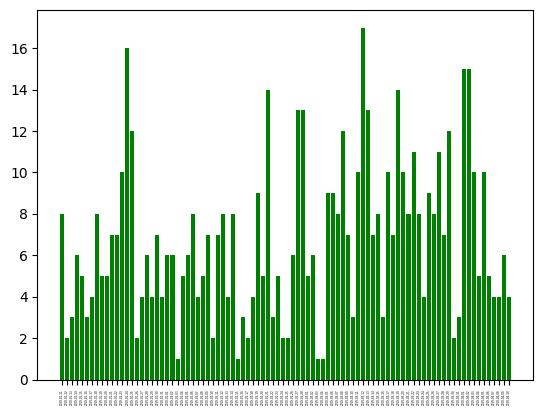

In [ ]:
plt.xticks(rotation=90, fontsize=2)
plt.bar(ordered_neutral.keys(), ordered_neutral.values(), color='g');

In [ ]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "ProGov"]["published_at"]]
vid_freq_pro = {}
for _, row in df[df["Label"] == "ProGov"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_pro:
        vid_freq_pro[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_pro[row["published_at"].split("T")[0]] = 1

In [ ]:
ordered_pro = OrderedDict(sorted(vid_freq_pro.items(), key=lambda t: t[0]))

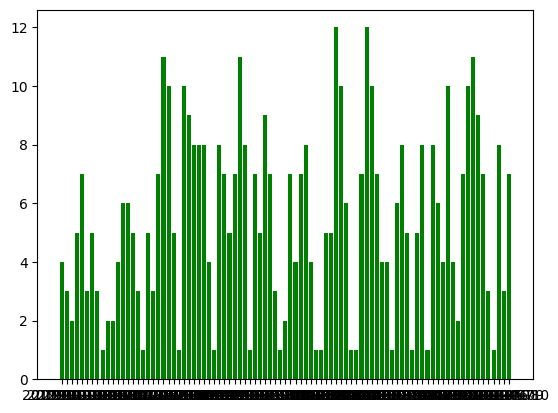

In [ ]:
plt.bar(ordered_pro.keys(), ordered_pro.values(), color='g');

In [ ]:
x = [dt.datetime.strptime(d.split("T")[0],'%Y-%m-%d').date() for d in df[df["Label"] == "AntiGov"]["published_at"]]
vid_freq_anti = {}
for _, row in df[df["Label"] == "AntiGov"].iterrows():
    if row["published_at"].split("T")[0] in vid_freq_anti:
        vid_freq_anti[row["published_at"].split("T")[0]] += 1
    else:
        vid_freq_anti[row["published_at"].split("T")[0]] = 1

In [ ]:
ordered_anti = OrderedDict(sorted(vid_freq_anti.items(), key=lambda t: t[0]))

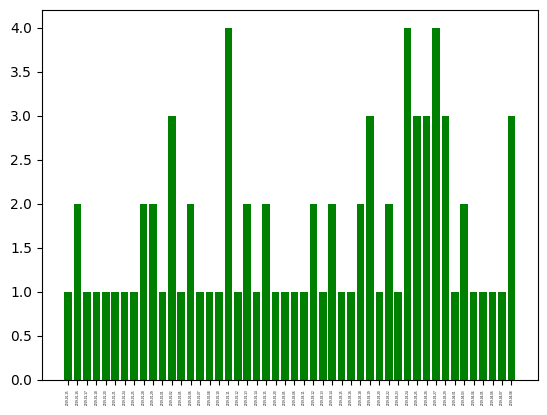

In [ ]:
plt.xticks(rotation=90, fontsize=2)
plt.bar(ordered_anti.keys(), ordered_anti.values(), color='g');

In [27]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
custom_list = ['said', 'say', 'one', 'well', 'says', 'know', 'put', 'something', 'another', 'music', 'got', 'talking', 'called', 'go', 'want', 'thing', 'going', 'yeah', 'ye', 'yes', 'new',
               'try', 'oh', 'car']

def remove_stopwords(df, column_name, language='english'):
    stop_words = set(stopwords.words(language))
    df[column_name] = df[column_name].astype(str).apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words and word.lower() not in custom_list]))
    return df

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

df = remove_stopwords(df, 'transcripts')

comment_words = ''
stopwords = set(STOPWORDS)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df[df["published_at"].apply(lambda x: x.split("-")[1]) == "01"]

,Unnamed: 0,videoId,title,description,published_at,channel,thumbnail_url,transcripts,generated_by_youtube,original_lang,views,comments,likes,pre_processed,entities,Label
69,88,t571gMQ4QRU,Political War Breaks Out Over NSSO Report On U...,The country's unemployment rate was at a 45-ye...,2019-01-31T16:04:59Z,CNN-News18,https://i.ytimg.com/vi/t571gMQ4QRU/hqdefault.jpg,[Music] rely Akkad anomic what's gonna happen ...,True,en,2729,15,28.0,rely Akkad anomic \n go to happen need \n ...,Akkad -> PERSON\nMatta -> GPE\npune -> GPE\nAy...,ProGov
70,89,F5TXuKHLzTY,&#39;Minimum Income Guarantee For BPL Families...,ElectionEpicentre #RahulGandhi Rahul Gandhi th...,2019-01-29T04:00:02Z,CNN-News18,https://i.ytimg.com/vi/F5TXuKHLzTY/hqdefault.jpg,heard 2019 battery Congress president Rahul Ga...,True,en,236,2,3.0,hear 2019 battery Congress \n president Rahu...,2019 -> DATE\nCongress -> ORG\nRahul Gandhi ->...,AntiGov
71,90,DbnrHyuqU_Y,Manikarnika: The Queen of Jhansi review by Raj...,CNN News18 film critic Rajeev Masand reviews t...,2019-01-25T20:15:43Z,CNN-News18,https://i.ytimg.com/vi/DbnrHyuqU_Y/hqdefault.jpg,biopic Rani Laxmi earliest patriots freedom st...,True,en,413808,1165,2391.0,biopic Rani Laxmi \n early patriot freedom s...,Rani Laxmi -> PERSON\nBritish -> NORP\n1858 ->...,Neutral
72,92,OnmdsRI6Bvk,We Could&#39;ve Offered Loan Waivers But In Pr...,The assembly election results in 2018 where th...,2019-01-25T12:10:08Z,CNN-News18,https://i.ytimg.com/vi/OnmdsRI6Bvk/hqdefault.jpg,[Music] results state assembly elections Decem...,True,en,255,0,5.0,result state assembly \n elections December ...,December -> DATE\nBJP -> ORG\nindian -> NORP\n...,ProGov
73,93,L-TRwsQ7JEo,Breaking News: BJP Is In An Alliance With Shiv...,A BJP Source tells CNN-News18 that BJP is alre...,2019-01-25T10:06:03Z,CNN-News18,https://i.ytimg.com/vi/L-TRwsQ7JEo/hqdefault.jpg,top BJP sources suggests shifts posturing affe...,True,en,14693,32,141.0,BJP source suggest \n shift posturing affect...,BJP -> ORG\nCena -> PERSON\nBJP -> ORG\nBJP ->...,ProGov
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1167,1363,V1pyuUKGEvw,"CBI Selection Panel To Meet On 24th January, 2019",Republic TV is India's no.1 English news chann...,2019-01-16T12:14:38Z,Republic World,https://i.ytimg.com/vi/V1pyuUKGEvw/hqdefault.jpg,breaking news coming far entire internal battl...,True,en,361,0,4.0,breaking news come far \n entire internal ba...,CBI -> ORG\nCBI -> ORG\nAlok Varma -> PERSON\n...,Neutral
1168,1364,qx0a2coAYz4,Church Body&#39;s Letter Accessed By Republic ...,Republic TV is India's no.1 English news chann...,2019-01-16T11:29:33Z,Republic World,https://i.ytimg.com/vi/qx0a2coAYz4/hqdefault.jpg,leave convent editor dungeon fact official let...,True,en,705,6,19.0,oh leave convent editor \n dungeon fact offi...,Jesus -> PERSON\nAlfea -> PERSON\nJesus -> PER...,Neutral
1169,1365,OVUMiE3tCc8,Four Nuns Who Spoke Against Franco Mulakkal Sh...,Republic TV is India's no.1 English news chann...,2019-01-16T11:15:26Z,Republic World,https://i.ytimg.com/vi/OVUMiE3tCc8/hqdefault.jpg,pull away uh breaking update Santa Fe's gettin...,True,en,16305,47,104.0,pull away uh break \n update Santa Fe gettin...,Santa Fe -> ORG\nFranco -> PERSON\nKerala -> G...,AntiGov
1170,1366,mF09iL30OCY,"After Being Dumped By SP-BSP, Rahul Gandhi For...",Republic TV is India's no.1 English news chann...,2019-01-15T06:14:38Z,Republic World,https://i.ytimg.com/vi/mF09iL30OCY/hqdefault.jpg,let's quickly turn attention Congress party sn...,True,en,364,3,6.0,let quickly turn attention \n Congress party...,Congress -> ORG\nAkhilesh Yadav -> PERSON\nnot...,Neutral


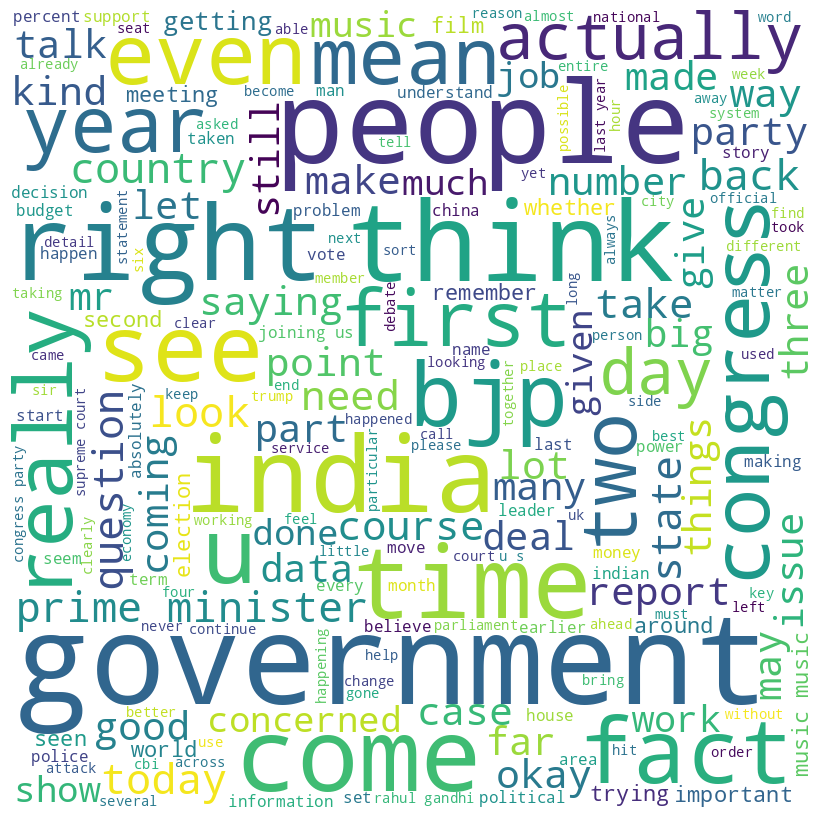

In [29]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "01"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


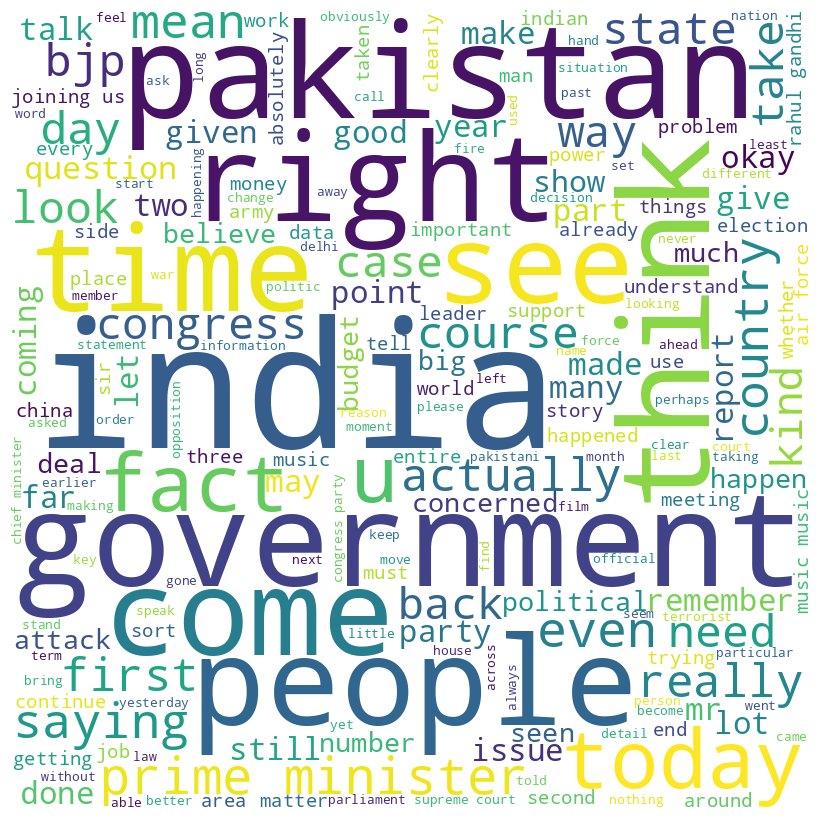

In [30]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "02"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


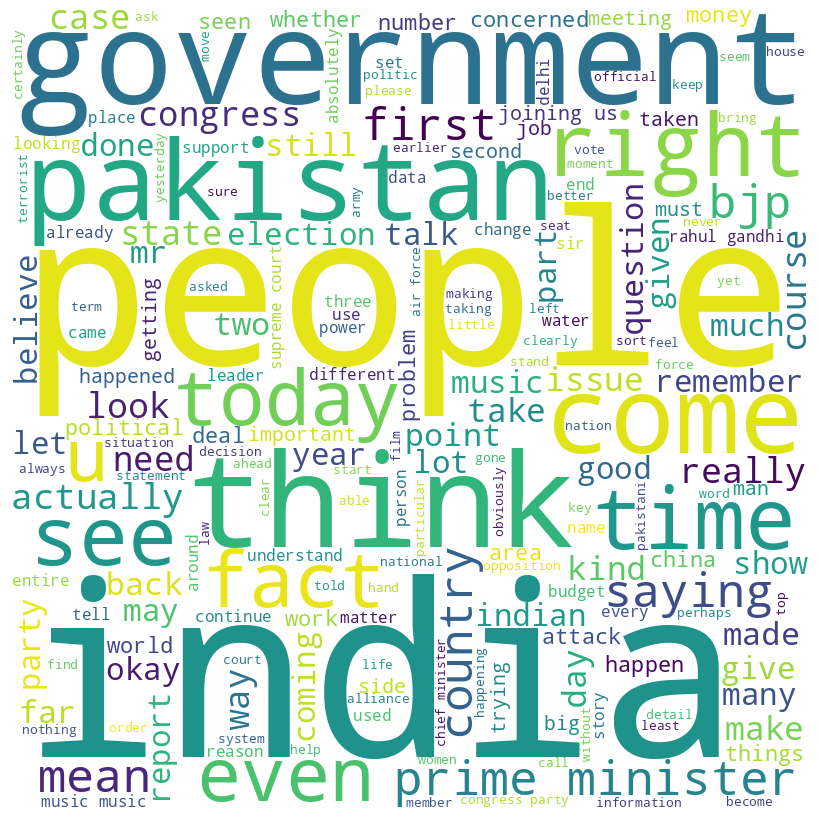

In [31]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "03"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


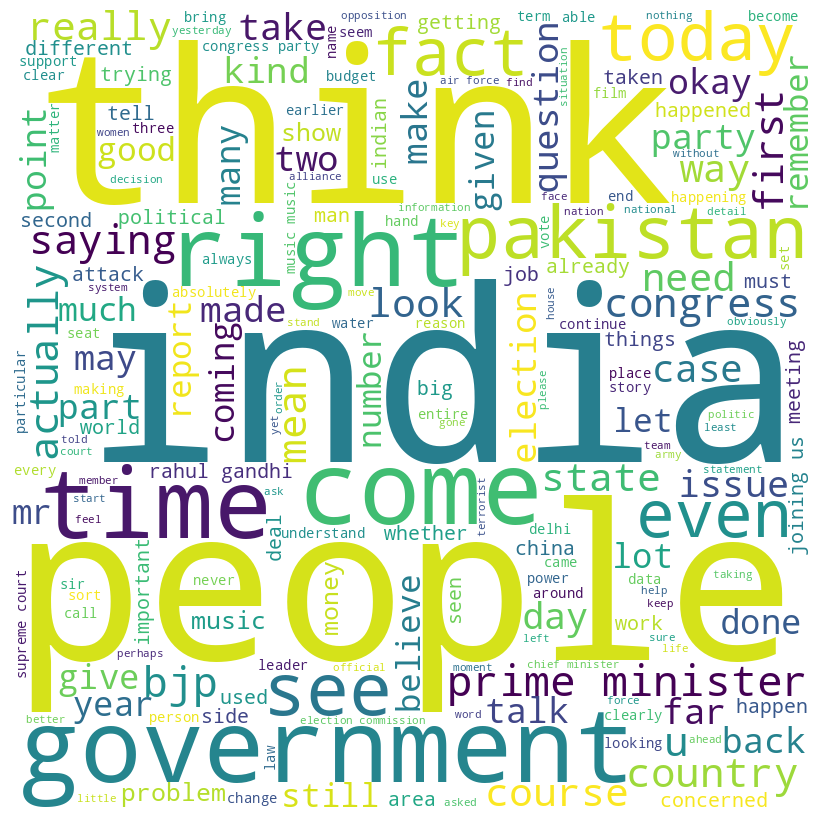

In [32]:
# iterate through the csv file
new_df = df[df["published_at"].apply(lambda x: x.split("-")[1]) == "04"]

for val in new_df.transcripts:

	# typecaste each val to string
	val = str(val)

	# split the value
	tokens = val.split()

	# Converts each token into lowercase
	for i in range(len(tokens)):
		tokens[i] = tokens[i].lower()

	comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
				background_color ='white',
				stopwords = stopwords,
				min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()
